## Quantum Fourier Transform

The main concept that we would develop here is to use a quantum computer to develop an analog of Fourier transform. 

Let's get started by Discrete Fourier Transform (DFT), which works on discrete data-set. We can write classically the DFT as --- 

$y_k = \frac{1}{\sqrt{N}} \sum \limits_{j=0}^{N-1} x_j\, e^{\frac{2\pi i jk}{N}}\, ....\, (1)$ ; $i = \sqrt{-1}$ and $j, k $ are indices running from 0 to N-1.  

Let's put this into action , consider $x_j = {2, 1}$, calculate $y_k$. Following the formula --- 

$y_0 = \frac{1}{\sqrt{2}} \left(2 e^{\frac{2\pi i 0 0 }{2}} + 1 e^{\frac{2\pi i 1 0 }{2}}\right) = \frac{3}{\sqrt{2}}\, $ and $\, y_1 = \frac{1}{\sqrt{2}} \left(2 e^{\frac{2\pi i 0 1 }{2}} + 1 e^{\frac{2\pi i 1 1 }{2}} \right) = \frac{1}{\sqrt{2}}$.  

As the state vectors for qubits are vectors of complex numbers, we can get the idea that DFT is applicable to them also. Given a state vector $|\psi \rangle = \sum \limits_{j=0}^{N-1} a_j |j\rangle$. It's possible to compute the DFT of this state as ---

$$\begin{aligned} F|\psi\rangle  = F \sum \limits_{j=0}^{N-1} a_j |j\rangle &= \sum \limits_{k=0}^{N-1} b_k |k\rangle \\ \text{where}, \, b_k &= \frac{1}{\sqrt{N}} \sum \limits_{j=0}^{N-1} a_j\, e^{\frac{2\pi i jk}{N}}\, ....\, (2)\end{aligned}$$. 

Best way to think of QFT as **DFT being applied to the amplitudes of the quantum state**. Also we can see that $F$ is linear. We can also think of the above transformation as map between two state vectors as -- 

$|j\rangle \mapsto \frac{1}{\sqrt{N}}\sum \limits_{j=0}^{N-1}  e^{\frac{2\pi i jk}{N}}\, |k\rangle \, ....\, (3)$. 

 The possibility of carrying out such transformations physically depends on whether the operator $F$ is unitary or not. This can be shown easily that $F$ is indeed unitary. First let's write the operator in outer product notation-- 

 $F = \frac{1}{\sqrt{N}}\sum \limits_{j=0}^{N-1} \sum \limits_{k=0}^{N-1} \, e^{\frac{2\pi i jk}{N}} |k\rangle \langle j|\, .... \, (4)$. 

 Using the definition above we can easily show that $F$ is unitary. Let's do that --- 

 $$\begin{aligned} F^{\dagger} =  \frac{1}{\sqrt{N}}\sum \limits_{j, k=0}^{N-1}  \, e^{\frac{-2\pi i jk}{N}} |j\rangle \langle k|, \, \, & \text{and},\, \, F =  \frac{1}{\sqrt{N}}\sum \limits_{j, k=0}^{N-1}  \, e^{\frac{2\pi i j'k'}{N}} |k'\rangle \langle j'| \\ F^{\dagger}\, F &= \frac{1}{N} \sum \limits_{j, j', k, k'}\, e^{\frac{2\pi i (j'k' - jk)}{N}} |j\rangle \langle j'| \delta _{kk'}\, \, ; \langle k|k'\rangle = \delta_{kk'} \\ & = \frac{1}{N} \sum \limits_{j, j', k}\, e^{\frac{2\pi i (j' - j)k}{N}}\, |j\rangle \langle j'|\, ....\, (5) \\ \text{remembering}\, \,, \frac{1}{2\pi} \int e^{i(w-w')t} & = \delta(w-w') \\ &= \sum \limits_{j, j' }\, |j\rangle \langle j'| \delta_{jj'} = \sum \limits_{j}\, |j\rangle \langle j'| = I \, ....\, (6)\end{aligned}$$. 

--------------------------------------------------------------- 

### Example Using 1 Qubit State

Let's consider a single qubit state as $|\psi\rangle = \alpha |0\rangle + \beta |1\rangle$. What would be the result after applying QFT to this state ? We have already seen that application of QFT to a state only affects the _amplitude_ of the state. Let's calculate the change in amplitude using equation $(2)$. Here $N = 2^1$, thus ---

$$\begin{aligned} b_0 &= \frac{1}{\sqrt{2}} ( a_0\, e^{\frac{2\pi i 0 \cdot 0}{2}} + a_1\, e^{\frac{2\pi i 1 \cdot 0}{2}}) = \frac{1}{\sqrt{2}} (\alpha + \beta)  \\ b_1 &= \frac{1}{\sqrt{2}} ( a_0\, e^{\frac{2\pi i 0 \cdot 1}{2}} + a_1\, e^{\frac{2\pi i 1 \cdot 1}{2}}) = \frac{1}{\sqrt{2}} (\alpha - \beta)\end{aligned}$$

Thus $F|\psi\rangle = b_0|0\rangle + b_1 |1\rangle = \frac{1}{\sqrt{2}} (\alpha + \beta) |0\rangle + \frac{1}{\sqrt{2}} (\alpha - \beta) |1\rangle $. 

So we can clearly see that the amplitudes changed from $\alpha \rightarrow \frac{1}{\sqrt{2}} (\alpha  + \beta)$ and $\beta \rightarrow \frac{1}{\sqrt{2}} (\alpha  - \beta)$. We already know this transformation, it is Hadamard $(H)$ transformation applied to the single qubit state. From here we can see that our initial basis, the $Z$ basis changed to $X$ basis and also H gate is an important component for building a QFT circuit. But is it the only component ? Let's see using the 2 qubits... 


### Example Using 2 Qubit States 

$|\psi\rangle = a_{00}|00\rangle + a_{01}|01\rangle + a_{10}|10\rangle + a_{11}|11\rangle$, here $N = 2^2$. Let's just calculate the transformed amplitudes 

$$\begin{aligned} b_{k} &= \frac{1}{2} \sum \limits_{j=0}^3 a_j \, e^{\frac{2\pi i jk}{4}} \\ b_0 &= \frac{1}{2} (a_{00} + a_{01} + a_{10} + a_{11}) \\ b_{1} & = \frac{1}{2} \left(a_{00} + a_{01}\, e^{\frac{2\pi i 1\cdot 1}{4}} + a_{10}\,  e^{\frac{2\pi i 2\cdot 1}{4}} + a_{11}\,  e^{\frac{2\pi i 3\cdot 1}{4}} \right) \\ b_2 &= \frac{1}{2} \left(a_{00} + a_{01} e^{\frac{2\pi i 1\cdot 2}{4}} + a_{11} e^{\frac{2\pi i 2\cdot 2}{4}} + a_{11} e^{\frac{2\pi i 3\cdot 2}{4}}\right) \\ b_3 &= \frac{1}{2} \left(a_{00} + a_{01}\,e^{\frac{2\pi i 1\cdot 3}{4}} + a_{10}\, e^{\frac{2\pi i 2\cdot 3}{4}} + a_{11}\, e^{\frac{2\pi i 3\cdot 3}{4}}\right)\end{aligned}$$

Let us consider $\omega = e^{\frac{i\pi}{2}} \implies \omega ^4 = 1$, so we can write the transformation matrix as 

$$F = \frac{1}{2}\, \begin{bmatrix} 1 & 1 & 1 & 1 \\ 1 & \omega & \omega ^2 & \omega ^3 \\ 1 & \omega ^2 & 1 & \omega ^2 \\ 1 & \omega ^3 & \omega ^2 & \omega \end{bmatrix}$$

If we compare the transformation applied to 1 qubit state to this 2 qubit states, we see that while the amplitudes for 1 qubit transformations are real (we know this also from Hadamard transformation), here we have real as well as complex amplitudes. Also Hadamard gate is its own inverse, this transformation matrix isn't. At this we point by closely inspecting $b_k$'s we see that apart from superposition, we also need to introduce some phase gate. A phase gate of the form below will do the job -- 

$$R_k = \begin{bmatrix} 1 & 0  \\ 0 & e^{\frac{2\pi i}{2^k}} \end{bmatrix}$$. 

We also see that the rotation depends on the other bits too, so instead of a simple phase gate we can introduce a controlled phase (CP) gate as below--- 

$$CP = \begin{bmatrix} I & 0  \\ 0 & R_k \end{bmatrix}$$.


The action of $CP$ on a two-qubit state $|x_0\, x_1\rangle$ where the first qubit is the control and the second is the target is given by

$$\begin{align}CP|0\, x_1\rangle &=|0\, x_1\rangle \\ CP|1\, x_1⟩&=\text{exp}\, \left(\frac{2πi} {2^k} x_1 \right)|1\, x_1\rangle\end{align}$$. 

At this point it is also important to generalize the Hadamard transformation in terms of rotation; let's consider the action of H on a single qubit state $|\psi_k\rangle$ as -- 

$H|\psi _k\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + \left(\text{exp}\,\frac{2\pi i}{2}\psi_k\right) |1\rangle \right)\, ....\, (7)$. 

-------------------------------------------------

### Generalized QFT Expression 

If we consider a state of $n$ qubits of the form 
$|\psi\rangle = |x_{n-1}\, x_{n-2}\, x_{n-3}\, ....\, x_{0}\rangle$ then QFT maps this state to 




$$|\psi\rangle = |x_{n-1}\, x_{n-2}\, x_{n-3}\, ....\, x_{0}\rangle \mapsto \\ \begin{align}\frac{1}{\sqrt{2^n}}(|0\rangle + e^{2\pi i[0\cdot x_{n-1}]}|1\rangle) \otimes \\  (|0\rangle + e^{2\pi i[0\cdot x_{n-2} \cdot x_{n-1}]}|1\rangle)\otimes \\ .\\ .\\. \\. \\ \otimes \\ (|0\rangle + e^{2\pi i[0\cdot x_0\cdot x_1\cdot ... \cdot x_{n-2} \cdot x_{n-1}]}|1\rangle)\, ...\, (8)\end{align}$$

where 

$$\begin{align}\frac{x_0}{2} &\rightarrow 0 \cdot x_0
 \\ \frac{x_0}{2^2} + \frac{x_1}{2} &\rightarrow 0 \cdot x_0 \cdot x_1 \\ \frac{x_0}{2^3} + \frac{x_1}{2^2} + \frac{x_2}{2} &\rightarrow 0 \cdot x_0 \cdot x_1 \cdot x_2\, \end{align}$$  

With this generalized expression probably it makes more sense why we need superposition gate $(H)$ along with phase gate. 

Let's see this in action by considering 3 Qubits. 

We would like to find the result of $F\, |x_2 \, x_1\, x_0\rangle$

1. Apply H gate to 1st qubit, 

$|\psi _1\rangle = |x_2\rangle \otimes |x_1\rangle \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + e^{\frac{2\pi i}{2} x_0}|1\rangle\right)$. 

2. Apply the phase gate to $|x_0\rangle$ depending on $|x_1\rangle$, i.e. controlled phase gate

$|\psi _2\rangle=|x_2\rangle \otimes |x_1\rangle \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + \text{exp}\, \left(\frac{2\pi i}{2^2}x_1 + \frac{2\pi i}{2}x_0 \right)|1\rangle \right)$. 

3. Apply the second controlled phase gate to $|x_0\rangle$ with $|x_2\rangle$ as control bit. 

$|\psi _3\rangle=|x_2\rangle \otimes |x_1\rangle \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + \text{exp}\, \left(\frac{2\pi i}{2^3}x_2 + \frac{2\pi i}{2^2}x_1 + \frac{2\pi i}{2}x_0\right)|1\rangle \right)$. 

4. Now we repeat the process for second qubit, so apply $H$ gate to second qubit

$$\begin{align}|\psi _4\rangle=|x_2\rangle \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + e^{\frac{2\pi i}{2} x_1}|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle + \text{exp}\, \left(\frac{2\pi i}{2^3}x_2 + \frac{2\pi i}{2^2}x_1 + \frac{2\pi i}{2}x_0\right)|1\rangle \right) \end{align}$$.

5. Now we apply the controlled phase gate on 2nd qubit depending on third qubit

$$\begin{align}|\psi _5\rangle=|x_2\rangle \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + \text{exp}\, \left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1 \right)|1\rangle\right)\otimes \frac{1}{\sqrt{2}}\left(|0\rangle + \text{exp}\, \left(\frac{2\pi i}{2^3}x_2 + \frac{2\pi i}{2^2}x_1 + \frac{2\pi i}{2}x_0\right)|1\rangle \right) \end{align}$$.

6. Finally we apply the $H$ gate to the final qubit 

$$\begin{align}|\psi _6\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle + e^{\frac{2\pi i}{2} x_2}|1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + \text{exp}\, \left(\frac{2\pi i}{2^2}x_2 + \frac{2\pi i}{2}x_1 \right)|1\rangle\right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle + \text{exp}\, \left(\frac{2\pi i}{2^3}x_2 + \frac{2\pi i}{2^2}x_1 + \frac{2\pi i}{2}x_0\right)|1\rangle \right)\, ....\, (9)\end{align}$$. 

We can readily compare with equation 8, and see that our result is similar for $n=3$ qubits, except the order of the qubits; for example: to compare with $0\cdot x_0 \cdot x_1 \rightarrow \frac{x_0}{2^2} + \frac{x_1}{2}$ in equation 8, our expression looks like  $0\cdot x_2 \cdot x_1 \rightarrow \frac{x_2}{2^2} + \frac{x_1}{2}$ (consider 2nd term in equation 9 and so on). So we need to swap the qubits, thankfully there are swap gates to do the job for us!

### Implementation Using Qiskit 

The example below is taken from the [Qiskit Notebook](https://qiskit.org/textbook/ch-algorithms/quantum-fourier-transform.html).   

In [ ]:
# !pip3 install qiskit

In [ ]:
import numpy as np
import qiskit as q

In [ ]:
### build a circuit for 3 qubits 

qr = q.QuantumRegister(3)
circ = q.QuantumCircuit(qr)
### add the first H gate (in qiskit east significant bit has the lowest index) 
circ.h(qr[2])
### add the controlled phase gate 
circ.cp(np.pi/2, qr[1], qr[2]) # based on qubit 1 apply 2pi/2**(k-1) rotation to qubit 2
### add the next cp gate
circ.cp(np.pi/4, qr[0], qr[2]) # based on qubit 0 apply 2pi/2**(k-1) rotation to qubit 2

### repeat the process for qubit 1
circ.h(qr[1])
circ.cp(np.pi/2, qr[0], qr[1])

### add the final h gate
circ.h(qr[0])

### finally swap the bits 0 th, and 2nd qubit 

circ.swap(qr[0], qr[2])

circ.draw()

┌───┐   
q0_0: ───────────────■─────────────■───────┤ H ├─X─
                     │       ┌───┐ │P(π/2) └───┘ │ 
q0_1: ──────■────────┼───────┤ H ├─■─────────────┼─
      ┌───┐ │P(π/2)  │P(π/4) └───┘               │ 
q0_2: ┤ H ├─■────────■───────────────────────────X─
      └───┘

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !pip install pylatexenc

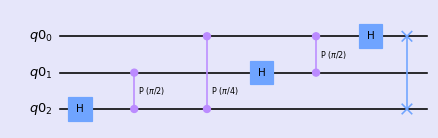

In [ ]:
path='/content/drive/My Drive/Colab Notebooks/'
style = {'backgroundcolor': 'lavender', 'dpi':200, 'subfontsize':10}


circ.draw('mpl', scale=0.8, style=style, filename=path+'qfouriert_3bits.png')

### Understanding the QFT Circuit  

Let's consider a state 110, first we encode the state in the circuit and then just repeat the steps above. Finally we would like to see how the state vectors changed after the qft. Let's go 

In [ ]:
qr = q.QuantumRegister(3)
circ1 = q.QuantumCircuit(qr)

### encode the state 110 at first
circ1.x(qr[2])
circ1.x(qr[1]) 

### repeat what's done before

### add the first H gate (in qiskit east significant bit has the lowest index) 
circ1.h(qr[2])
### add the controlled phase gate 
circ1.cp(np.pi/2, qr[1], qr[2]) # based on qubit 1 apply 2pi/2**(k-1) rotation to qubit 2
### add the next cp gate
circ1.cp(np.pi/4, qr[0], qr[2]) # based on qubit 0 apply 2pi/2**(k-1) rotation to qubit 2

### repeat the process for qubit 1
circ1.h(qr[1])
circ1.cp(np.pi/2, qr[0], qr[1])

### add the final h gate
circ1.h(qr[0])

### finally swap the bits 0 th, and 2nd qubit 

circ1.swap(qr[0], qr[2])

circ1.draw()

┌───┐   
q1_0: ────────────────────■─────────────■───────┤ H ├─X─
      ┌───┐               │       ┌───┐ │P(π/2) └───┘ │ 
q1_1: ┤ X ├──────■────────┼───────┤ H ├─■─────────────┼─
      ├───┤┌───┐ │P(π/2)  │P(π/4) └───┘               │ 
q1_2: ┤ X ├┤ H ├─■────────■───────────────────────────X─
      └───┘└───┘

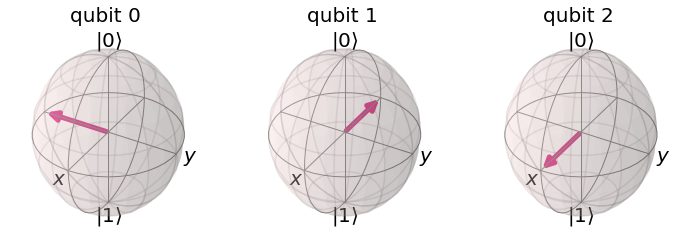

In [ ]:
circ1.save_statevector()

qasm_sim = q.Aer.get_backend('qasm_simulator')


statevector = qasm_sim.run(circ1).result().get_statevector()
q.visualization.plot_bloch_multivector(statevector)

Initially qubit 0 was at state 0, and qubit 1 and 2 in state 1. We are trying to encode the 110 aka state 6 $(2^2 + 2^1 + 0)$. So first qubit rotates $\frac{6}{2^3}\times 2\pi = 270^{\circ}$. Second qubit rotates $\frac{6}{2^2}\times 2\pi = 540^{\circ}= 2\pi + \pi$ and third qubit rotates $\frac{6}{2^1}\times 2\pi = 3 \times 2\pi$. 

In [ ]:
qr = q.QuantumRegister(3)
circ2 = q.QuantumCircuit(qr)

### encode the state 101 at first
circ2.x(qr[2])
circ2.x(qr[0]) 

### repeat what's done before

### add the first H gate (in qiskit east significant bit has the lowest index) 
circ2.h(qr[2])
### add the controlled phase gate 
circ2.cp(np.pi/2, qr[1], qr[2]) # based on qubit 1 apply 2pi/2**(k-1) rotation to qubit 2
### add the next cp gate
circ2.cp(np.pi/4, qr[0], qr[2]) # based on qubit 0 apply 2pi/2**(k-1) rotation to qubit 2

### repeat the process for qubit 1
circ2.h(qr[1])
circ2.cp(np.pi/2, qr[0], qr[1])

### add the final h gate
circ2.h(qr[0])

### finally swap the bits 0 th, and 2nd qubit 

circ2.swap(qr[0], qr[2])

circ2.draw()

┌───┐                                     ┌───┐   
q2_0: ┤ X ├───────────────■─────────────■───────┤ H ├─X─
      └───┘               │       ┌───┐ │P(π/2) └───┘ │ 
q2_1: ───────────■────────┼───────┤ H ├─■─────────────┼─
      ┌───┐┌───┐ │P(π/2)  │P(π/4) └───┘               │ 
q2_2: ┤ X ├┤ H ├─■────────■───────────────────────────X─
      └───┘└───┘

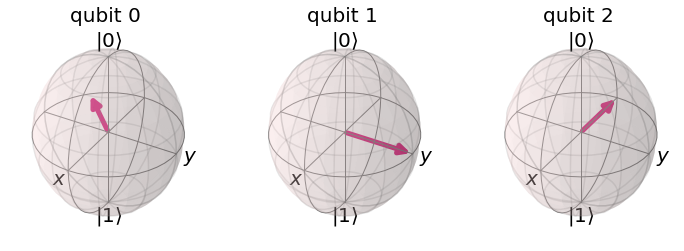

In [ ]:
circ2.save_statevector()

qasm_sim = q.Aer.get_backend('qasm_simulator')


statevector2 = qasm_sim.run(circ2).result().get_statevector()
q.visualization.plot_bloch_multivector(statevector2)

Result of encoding 101 (aka 5) state. Compare with previous one where we encoded 110 (aka 6) state. 